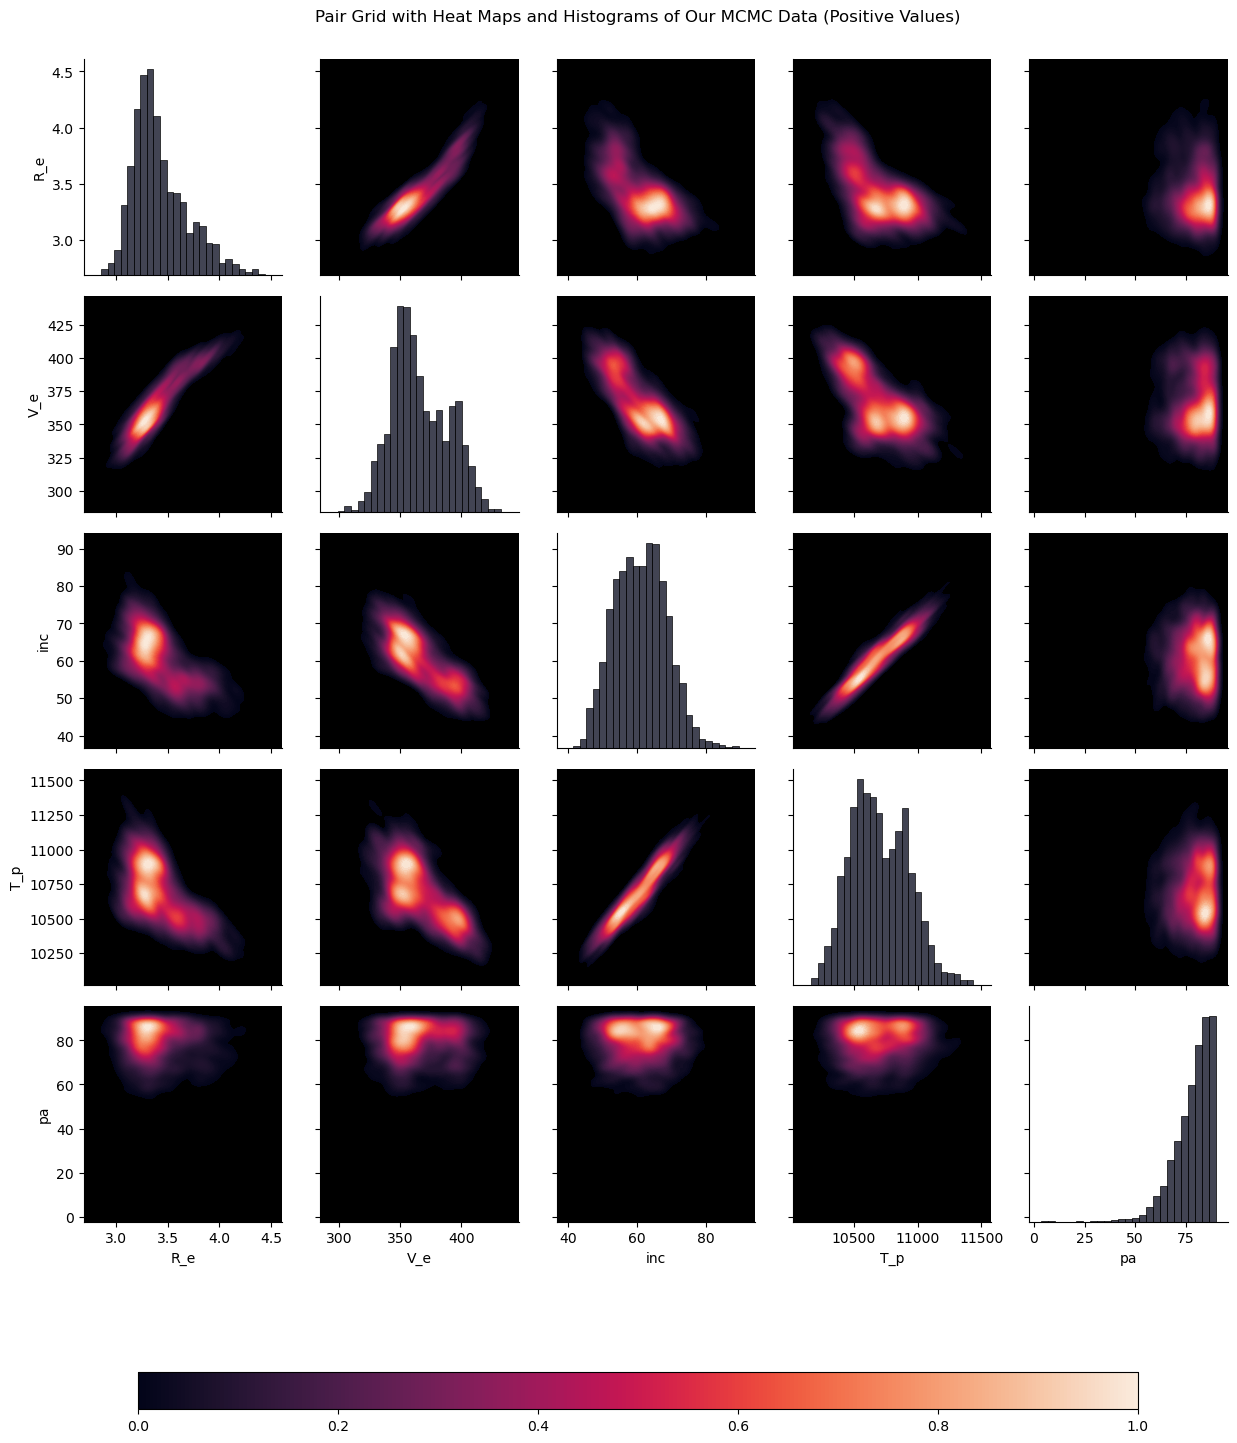

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read MCMC data from a .mcmc file. Remember that the file has a utf-8 encoding
def read_mcmc_data(file_path, encoding='utf-8'):
    data = pd.read_csv(file_path, delimiter='\t', encoding=encoding)
    return data

# Path to dataset file
file_path = "/Users/john/Downloads/HD177724.mcmc"

# Read the MCMC data from the .mcmc file
try:
    mcmc_data = read_mcmc_data(file_path, encoding='utf-8')
except IOError:
    print("Error: File not found or could not be read.")
    exit(1)

# A particular subset of columns for the pair plot (similar to Dr. Jones' correlation plot)
columns_of_interest = ['R_e', 'V_e', 'inc', 'T_p', 'pa']

# Filter positive values, dropping all negative values 
subset_data = mcmc_data[columns_of_interest]
subset_data = subset_data[subset_data > 0].dropna()

# Create the pair grid with histograms and heat maps for positive values
g = sns.PairGrid(data=subset_data, diag_sharey=False)

# Map KDE plots in the upper and lower triangles with the 'rocket' color map
g.map_upper(sns.kdeplot, cmap='rocket', fill=True, levels=100)
g.map_lower(sns.kdeplot, cmap='rocket', fill=True, levels=100)

# Map histograms on the diagonal
g.map_diag(sns.histplot, kde=False, color="#03051A", bins=25)

# Set the background color of the pair grid
for ax in g.axes.flat:
    if isinstance(ax, plt.Axes) and ax.collections:
        ax.set_facecolor('#000000')  # Set black background color for pair grid 

# Create a single color bar below the pair grid
cbar_ax = g.fig.add_axes([0.1, -0.1, 0.8, 0.03])  # Adjust the position and size of the color bar

# Create a color bar with the 'rocket' colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

# Plot the color bar with the 'rocket' colormap, otherwise code will plot in Viridis
cbar = plt.colorbar(mappable=plt.imshow(gradient, aspect='auto', cmap='rocket'),
                    cax=cbar_ax, orientation='horizontal')

# Color bar ticks 
cbar_ax.tick_params(colors='black')


g.fig.suptitle("Pair Grid with Heat Maps and Histograms of Our MCMC Data (Positive Values)", y=1.02)
plt.savefig('Jones_mcmc_data_test.png', dpi=500)
plt.show()
